# ダウ工業株30種平均 日足 メディアン統計

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

from funcs.technical import calc_robust_bollinger

code = 'DJI'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='1y', interval='1d')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-25 00:00:00-04:00,39410.539062,39430.171875,39296.031250,39313.640625,323670000,0.0,0.0
2024-03-26 00:00:00-04:00,39338.320312,39439.441406,39277.191406,39282.328125,306940000,0.0,0.0
2024-03-27 00:00:00-04:00,39461.980469,39769.410156,39461.980469,39760.078125,332190000,0.0,0.0
2024-03-28 00:00:00-04:00,39763.738281,39868.589844,39717.250000,39807.371094,360970000,0.0,0.0
2024-04-01 00:00:00-04:00,39807.929688,39815.000000,39491.218750,39566.851562,269470000,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-18 00:00:00-04:00,41772.910156,41787.250000,41415.429688,41581.308594,569810000,0.0,0.0
2025-03-19 00:00:00-04:00,41613.191406,42178.410156,41613.191406,41964.628906,577530000,0.0,0.0
2025-03-20 00:00:00-04:00,41795.261719,42250.289062,41695.609375,41953.320312,545240000,0.0,0.0


In [3]:
df0 = ticker.history(period='2y', interval='1d')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-27 00:00:00-04:00,32276.720703,32564.000000,32276.720703,32432.080078,291560000,0.0,0.0
2023-03-28 00:00:00-04:00,32434.849609,32551.009766,32295.500000,32394.250000,248560000,0.0,0.0
2023-03-29 00:00:00-04:00,32566.539062,32728.039062,32539.939453,32717.599609,314110000,0.0,0.0
2023-03-30 00:00:00-04:00,32807.429688,32905.800781,32682.869141,32859.031250,283380000,0.0,0.0
2023-03-31 00:00:00-04:00,32901.960938,33291.000000,32901.960938,33274.148438,353740000,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-18 00:00:00-04:00,41772.910156,41787.250000,41415.429688,41581.308594,569810000,0.0,0.0
2025-03-19 00:00:00-04:00,41613.191406,42178.410156,41613.191406,41964.628906,577530000,0.0,0.0
2025-03-20 00:00:00-04:00,41795.261719,42250.289062,41695.609375,41953.320312,545240000,0.0,0.0


## Moving Median

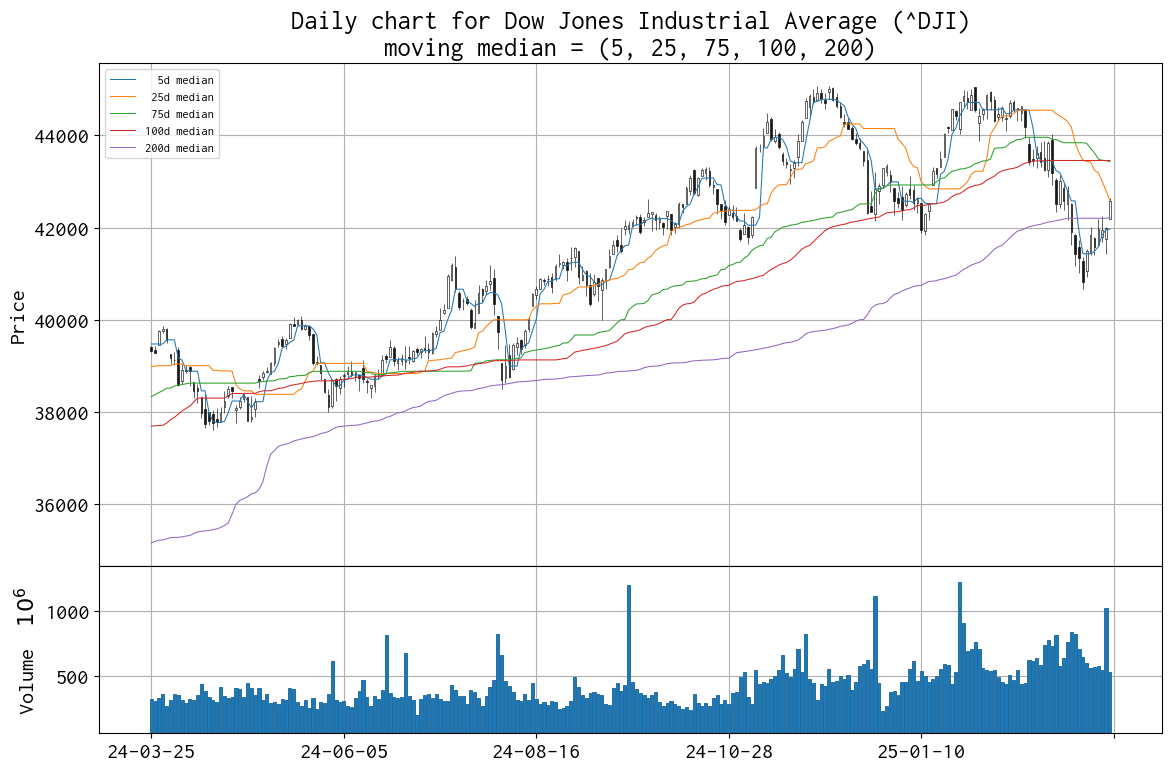

In [4]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

mm005 = df0['Close'].rolling(5).median()
mm025 = df0['Close'].rolling(25).median()
mm075 = df0['Close'].rolling(75).median()
mm100 = df0['Close'].rolling(100).median()
mm200 = df0['Close'].rolling(200).median()

apds  = [
    mpf.make_addplot(mm005[df.index], width=0.75, label='  5d median', ax=ax[0]),
    mpf.make_addplot(mm025[df.index], width=0.75, label=' 25d median', ax=ax[0]),
    mpf.make_addplot(mm075[df.index], width=0.75, label=' 75d median', ax=ax[0]),
    mpf.make_addplot(mm100[df.index], width=0.75, label='100d median', ax=ax[0]),
    mpf.make_addplot(mm200[df.index], width=0.75, label='200d median', ax=ax[0]),
]   

mpf.plot(
    df, type='candle', style='default',
    volume=ax[1],
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)
ax[0].set_title('Daily chart for %s (%s)\nmoving median = (5, 25, 75, 100, 200)' %(ticker.info['longName'], symbol))
ax[0].legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('report_daily_chart_median_%s.png' % code)
plt.show()

In [5]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-21 00:00:00-04:00,41763.398438,42011.398438,41433.859375,41985.351562,1026600000,0.0,0.0
2025-03-24 00:00:00-04:00,42180.101562,42638.851562,42180.140625,42583.320312,529476167,0.0,0.0


In [6]:
df.tail(2)['Close']

Date
2025-03-21 00:00:00-04:00    41985.351562
2025-03-24 00:00:00-04:00    42583.320312
Name: Close, dtype: float64

In [7]:
df.tail(2)['Close'].diff()

Date
2025-03-21 00:00:00-04:00          NaN
2025-03-24 00:00:00-04:00    597.96875
Name: Close, dtype: float64

In [8]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-03-24 00:00:00-04:00    403.21875
dtype: float64

In [9]:
df['Close'].rolling(9).median().tail()

Date
2025-03-18 00:00:00-04:00    41581.308594
2025-03-19 00:00:00-04:00    41581.308594
2025-03-20 00:00:00-04:00    41581.308594
2025-03-21 00:00:00-04:00    41581.308594
2025-03-24 00:00:00-04:00    41841.628906
Name: Close, dtype: float64

In [10]:
df['Close'].rolling(13).median().tail()

Date
2025-03-18 00:00:00-04:00    41911.710938
2025-03-19 00:00:00-04:00    41911.710938
2025-03-20 00:00:00-04:00    41911.710938
2025-03-21 00:00:00-04:00    41911.710938
2025-03-24 00:00:00-04:00    41911.710938
Name: Close, dtype: float64

In [11]:
df['Close'].rolling(26).median().tail()

Date
2025-03-18 00:00:00-04:00    43333.759766
2025-03-19 00:00:00-04:00    43215.369141
2025-03-20 00:00:00-04:00    43098.914062
2025-03-21 00:00:00-04:00    42904.154297
2025-03-24 00:00:00-04:00    42692.519531
Name: Close, dtype: float64

In [12]:
df['Close'].rolling(52).median().tail()

Date
2025-03-18 00:00:00-04:00    43447.166016
2025-03-19 00:00:00-04:00    43447.166016
2025-03-20 00:00:00-04:00    43447.166016
2025-03-21 00:00:00-04:00    43447.166016
2025-03-24 00:00:00-04:00    43447.166016
Name: Close, dtype: float64

## Robust Bollinger's bands

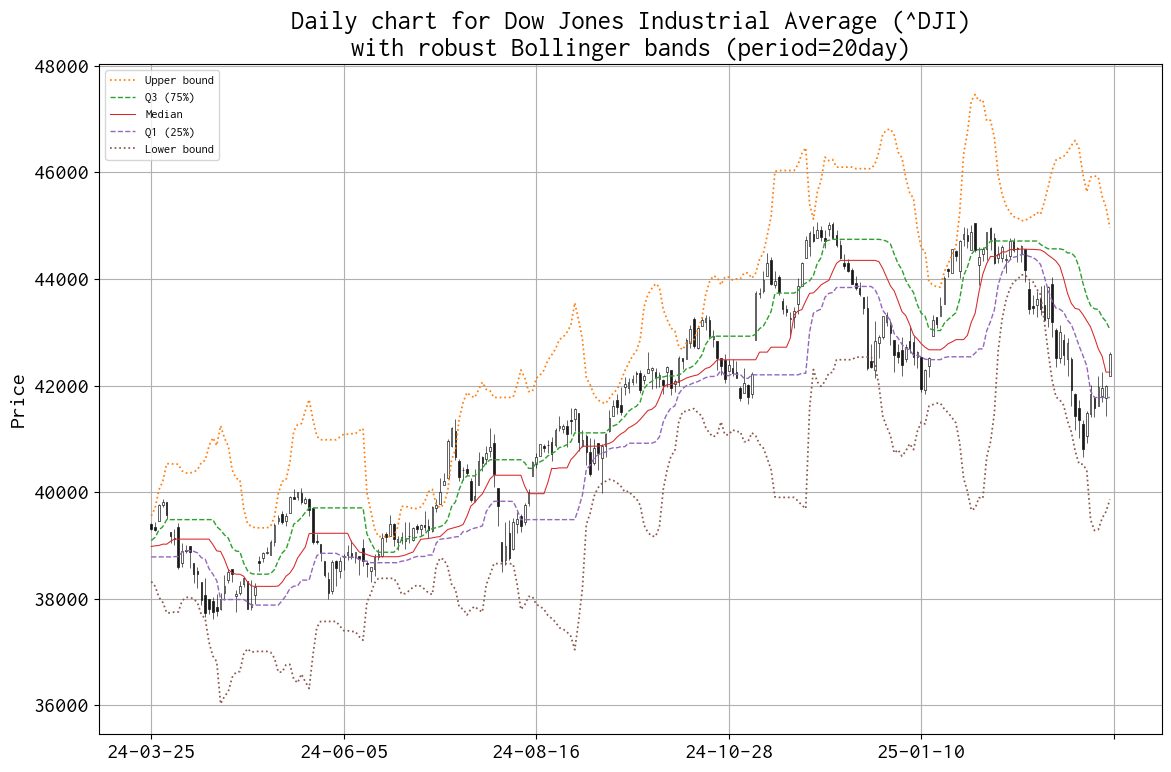

In [13]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))

# Bollinger bands
period = 20
mv_median = df0['Close'].rolling(period).median()
mv_q1 = df0['Close'].rolling(period).quantile(.25)
mv_q3 = df0['Close'].rolling(period).quantile(.75)
mv_iqr = mv_q3 - mv_q1
mv_lower = mv_q1 - mv_iqr * 1.5
mv_upper = mv_q3 + mv_iqr * 1.5

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax,
)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Daily chart for %s (%s)\nwith robust Bollinger bands (period=%dday)' % (ticker.info['longName'], symbol, period))
except KeyError:
    ax.set_title('Daily chart for %s\nwith robust Bollinger bands (period=%dday)' % (symbol, period))

plt.tight_layout()
plt.savefig('report_daily_chart_bollinger_robust_%s.png' % code)
plt.show()

## ヒストグラム

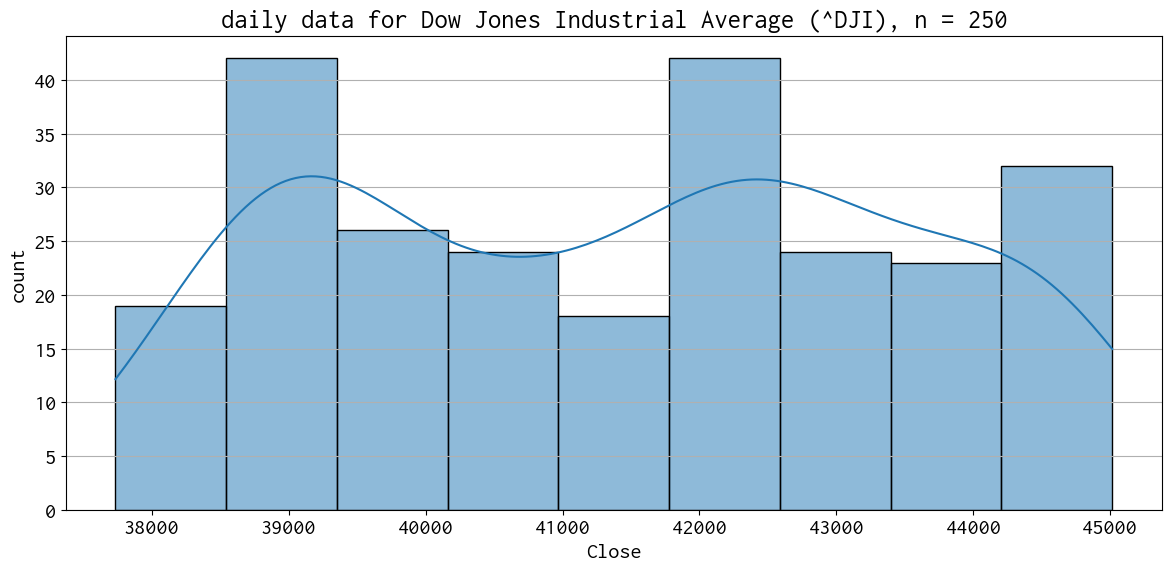

In [14]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

sns.histplot(
    df['Close'],
    kde=True,
    ax=ax
)

ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('daily data for %s (%s), n = %d' % (ticker.info['longName'], symbol, len(df)))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('report_daily_histogram_%s.png' % code)
plt.show()